Purpose: To extract top predictors from random forest genes-as-features models by top percentage (try 10, 15, and 20 and see how they differ) of feature importance.<br>
Author: Anna Pardo<br>
Date initiated: Aug. 21, 2023

In [1]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# load feature importance files
## set directory
directory = "../../data/rf_outputs/upsample_13-Jul-2023/"

In [3]:
# make dictionary of FI dataframes
fid = {}
for subd in os.listdir(directory):
    s = subd.split("T")[0]
    for f in os.listdir(directory+subd):
        if f.endswith("_sorted.tsv"):
            fid[s] = pd.read_csv(directory+subd+"/"+f,sep="\t",header="infer")

In [4]:
fid["Cold"].head()

,GeneID,Feature_Importance
0,Zm00001eb285170,0.004001
1,Zm00001eb281500,0.003495
2,Zm00001eb330160,0.003475
3,Zm00001eb159030,0.002896
4,Zm00001eb411460,0.002646


(array([3.8985e+04, 5.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.        , 0.00872102, 0.01744204, 0.02616306, 0.03488407,
        0.04360509, 0.05232611, 0.06104713, 0.06976815, 0.07848917,
        0.08721018]),
 <BarContainer object of 10 artists>)

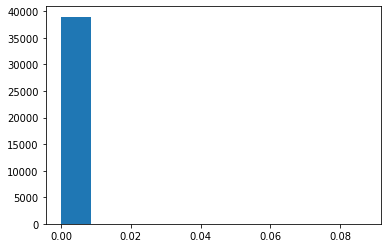

In [5]:
# plot histograms of feature importance for each stressor
plt.hist(fid["Heat"]["Feature_Importance"])

In [6]:
# pull out top 10% of feature importances for each df and see how much overlap there is
top10dict = {}
for k in fid:
    df = fid[k]
    threshold = df["Feature_Importance"].quantile(q=0.9)
    top10dict[k] = df[df["Feature_Importance"]>=threshold]

In [7]:
for k in top10dict:
    print(k)
    print(len(top10dict[k].index))

Flooding
3900
Low_Nitrogen
3900
Heat
3900
Drought
3900
Cold
3900
Salt
3900


In [8]:
# get the set intersection and see what percent of total genes that represents
setstop10 = {}
for k in top10dict:
    setstop10[k] = set(list(top10dict[k]["GeneID"]))

In [9]:
# make list of sets for intersecting & uniting
setslist = [setstop10["Cold"],setstop10["Heat"],setstop10["Flooding"],setstop10["Low_Nitrogen"],setstop10["Drought"],
           setstop10["Salt"]]

In [10]:
totalgenes = set.union(*setslist)

In [11]:
coregenes = set.intersection(*setslist)

In [12]:
len(coregenes)

120

In [13]:
len(totalgenes)

13070

In [14]:
len(coregenes)/len(totalgenes)

0.009181331293037491

In [15]:
# repeat with top 15% and 20%
def topX(fi_dict,X):
    quant = (100-X)/100
    topXdict = {}
    for k in fid:
        df = fid[k]
        threshold = df["Feature_Importance"].quantile(q=quant)
        topXdict[k] = df[df["Feature_Importance"]>=threshold]
        
    setstopX = {}
    for k in topXdict:
        setstopX[k] = set(list(topXdict[k]["GeneID"]))
        
    setslist = [setstopX["Cold"],setstopX["Heat"],setstopX["Flooding"],setstopX["Low_Nitrogen"],setstopX["Drought"],
               setstopX["Salt"]]
    
    totalgenes = set.union(*setslist)
    coregenes = set.intersection(*setslist)
    
    print((len(coregenes)/len(totalgenes))*100)
    
    return totalgenes, coregenes

In [16]:
tg15, cg15 = topX(fid,15)

1.276243093922652


In [17]:
tg20, cg20 = topX(fid,20)

1.7958454322090687


In [18]:
len(cg20)

402

In [19]:
len(tg20)

22385

In [20]:
len(cg15)

231

In [21]:
tg25, cg25 = topX(fid,25)

2.248840803709428


In [22]:
len(cg25)

582

In [23]:
# load the core stress genes that came from set operations
cgup = pd.read_csv("../../data/core_upgenes_fromsets.txt",sep="\t",header=None)
cgdown = pd.read_csv("../../data/core_downgenes_fromsets.txt",sep="\t",header=None)

In [24]:
cgup.head()

,0
0,Zm00001eb021040
1,Zm00001eb364390
2,Zm00001eb096490
3,Zm00001eb148000
4,Zm00001eb395440


In [25]:
len(cgup.index)

391

In [26]:
len(cgdown.index)

152

In [27]:
cgu = set(list(cgup[0]))
cgd = set(list(cgdown[0]))

In [30]:
len(cgu.union(cgd))

537

In [29]:
len(cgu)+len(cgd)

543

In [31]:
setcg = cgu.union(cgd)

In [32]:
# select the top 20% as the cutoff and check how much intersection there is between the sets from the two methods
len(setcg.intersection(cg20))

45

In [33]:
len(tg20)

22385

In [34]:
len(cg20)

402

In [35]:
len(cg20.union(setcg))

894

In [37]:
# save some gene lists
with open("../../data/union_core_stress_genes.txt","w+") as outfile:
    for i in cg20.union(setcg):
        outfile.write(i+"\n")

In [38]:
with open("../../data/core_genes_from_rf.txt","w+") as outfile:
    for i in cg20:
        outfile.write(i+"\n")